# **Sentiment Analysis**
## **DSC478 Programming Machine Learning**
**Name:**
*   **Shubham Sawant**

**Professor:**
*   **David Hubbard**

**Info:**
* **Fall Quarter 2024**
* **Username = ssawant4**
* **User Id: 2119480**


---




**Problem:** 

The issue that we are dealing with is sentiment analysis on movie reviews. Our goal in this task is using machine learning to give positive or negative feedback on movie reviews. Also, we discuss how various classification algorithms and ensemble methods can predict sentiment analysis.

**Dataset:**

* Dataset Source: https://www.kaggle.com/datasets/thedevastator/movie-reviews-dataset-with-sentiment-labels
* This dataset is comprised of thousands of movie reviews from viewers and worldwide. Every review received a sentiment label that separate it onto a positive or negative review. Analyse this data for an overall sentiment towards specific movies and extend the observation of the sentiment trend across different types of genres, ratings and so on and so forth Studying peoples responses to various films and trends coming in the market patterns are useful for other end projects with the touch of a button. This dataset available at Kaggle can assist you to identify diverse facets of how viewes perceive movies in some segments and provide you with the insights necessary for the decision-making in the entertainment field.
* **About the files:*** 
The moviereviews.cs and moviereviews2.csvvares the filsethath includs the movie reviews and based on the classification we have positive and negative.

**Imports**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Reading files**

In [7]:
# Paths
file1 = "C:\\Users\\shubham\\Desktop\\DePaul\\DSC 478\\Project\\moviereviews.csv"
file2 = "C:\\Users\\shubham\\Desktop\\DePaul\\DSC 478\\Project\\moviereviews2.csv"

# Read datasets
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Display the first few rows
print(data1.head())
print(data2.head())

   index label                                             review
0      0   neg  how do films like mouse hunt get into theatres...
1      1   neg  some talented actresses are blessed with a dem...
2      2   pos  this has been an extraordinary year for austra...
3      3   pos  according to hollywood movies made in last few...
4      4   neg  my first press screening of 1998 and already i...
   index label                                             review
0      0   pos  I loved this movie and will watch it again. Or...
1      1   pos  I was not expecting the powerful filmmaking ex...
2      2   neg  This so-called "documentary" tries to tell tha...
3      3   neg  This is without a doubt the worst movie I have...
4      4   pos  At least something good came out of Damon Runy...


**Understanding dataset 1 & Dataset 2**

In [9]:
# Dataset overview
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2000 non-null   int64 
 1   label   2000 non-null   object
 2   review  1965 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2801 non-null   int64 
 1   label   2801 non-null   object
 2   review  2781 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.8+ KB
None


In [10]:
# Check for missing values
print(data1.isnull().sum())
print(data2.isnull().sum())

index      0
label      0
review    35
dtype: int64
index      0
label      0
review    20
dtype: int64


In [11]:
# Basic statistics
print(data1.describe())
print(data2.describe())

             index
count  2000.000000
mean    999.500000
std     577.494589
min       0.000000
25%     499.750000
50%     999.500000
75%    1499.250000
max    1999.000000
             index
count  2801.000000
mean   1400.000000
std     808.723377
min       0.000000
25%     700.000000
50%    1400.000000
75%    2100.000000
max    2800.000000


**Data Preparation & Cleaning**

In [13]:
# Drop missing values
data1 = data1.dropna()
data2 = data2.dropna()

In [14]:
# Check for duplicates
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()

In [15]:
# Display the first review in 'review' column
print(data1['review'].iloc[0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

**EDA - Visualization**

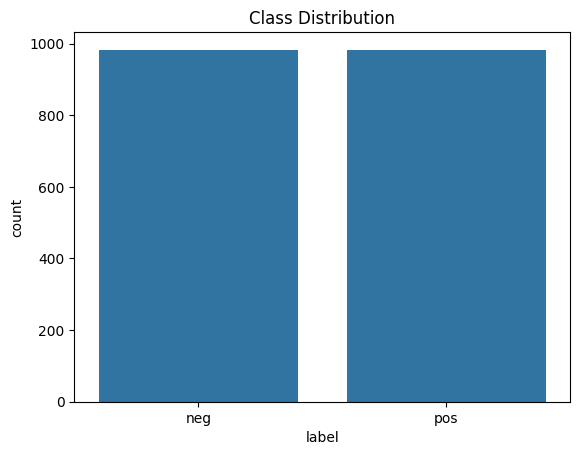

In [17]:
sns.countplot(x="label", data=data1)
plt.title("Class Distribution")
plt.show()

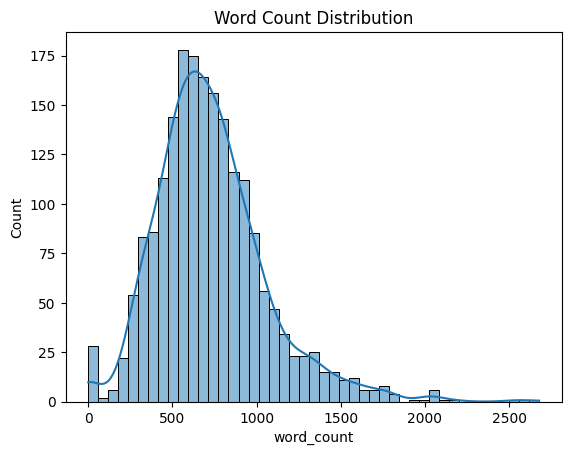

In [18]:
data1['word_count'] = data1['review'].apply(lambda x: len(x.split()))
sns.histplot(data1['word_count'], kde=True)
plt.title("Word Count Distribution")
plt.show()

###**Sentiment Analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner)**

VADER stands for Valence Aware Dictionary and sEntiment Reasoner. It is a rule-based sentiment analysis tool specifically designed for analyzing and categorizing sentiments in text. VADER is widely used in natural language processing (NLP) tasks, including sentiment analysis and opinion mining.

VADER takes into account both the polarity (positive, negative) and intensity (strength) of sentiments expressed in text. It uses a pre-constructed sentiment lexicon that contains a vast collection of words and their associated sentiment scores. The lexicon includes not only standard English words but also words that are commonly found in social media and online text.

The key features of VADER include:

1. Polarity Detection: VADER can determine the sentiment polarity of a text as positive, negative, or neutral.

2. Sentiment Intensity: VADER provides a sentiment intensity score for each text, indicating the strength of the sentiment expressed.

3. Emoticon and Capitalization Handling: VADER accounts for the impact of emoticons and capitalization on sentiment analysis.

4. Degree Modifiers: VADER considers degree modifiers (such as "very," "extremely") to adjust sentiment intensity.

VADER is known for its effectiveness in analyzing sentiments in social media texts and short informal sentences. It is particularly useful for tasks where the sentiment analysis needs to handle informal language, slang, or expressions commonly found in social media posts and online content.

VADER is available as an open-source tool and can be used in various programming languages such as Python. It is commonly used in sentiment analysis tasks to quickly assess the sentiment polarity and intensity of textual data.

**VADER Sentiment Scoring** 

*SentimentIntensityAnalyzer* analyzes the sentiment of text by providing a sentiment intensity score for neg, neu, pos and compund for each review (document). It basically analyzes the sentiment of each text and extract sentiment information for further analysis or processing.

*tqdm* module is for progress tracking.


**How VADER works in our case?**

Testing on this particular dataset, we employ VADER to determine sentiment polarity which gives an evaluation of how positive, neutral or negative the review is.

**Modifying the dataset for VADER and Results**

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to calculate the compound sentiment score for each review
data1['vader_score'] = data1['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [26]:
# Display the first few rows of data1
print(data1.head())

   index label                                             review  word_count  \
0      0   neg  how do films like mouse hunt get into theatres...         409   
1      1   neg  some talented actresses are blessed with a dem...         662   
2      2   pos  this has been an extraordinary year for austra...         752   
3      3   pos  according to hollywood movies made in last few...         941   
4      4   neg  my first press screening of 1998 and already i...         815   

   vader_score  
0      -0.9250  
1      -0.9087  
2       0.9968  
3       0.9976  
4      -0.6399  


In [27]:
print(data1[['review', 'vader_score']].head())

                                              review  vader_score
0  how do films like mouse hunt get into theatres...      -0.9250
1  some talented actresses are blessed with a dem...      -0.9087
2  this has been an extraordinary year for austra...       0.9968
3  according to hollywood movies made in last few...       0.9976
4  my first press screening of 1998 and already i...      -0.6399


In [28]:
print(data1['vader_score'].describe())

count    1965.000000
mean        0.407042
std         0.832498
min        -0.999600
25%        -0.660600
50%         0.968200
75%         0.994800
max         0.999900
Name: vader_score, dtype: float64


**Running the SentimentIntensityAnalyzer on the entire dataset**

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def calculate_vader_scores(review):
    scores = analyzer.polarity_scores(review)
    return pd.Series({
        'vader_compound': scores['compound'],
        'vader_positive': scores['pos'],
        'vader_negative': scores['neg'],
        'vader_neutral': scores['neu']
    })

# Apply VADER to the reviews
vader_scores = data1['review'].apply(calculate_vader_scores)

# Display the calculated VADER scores
print(vader_scores.head())

   vader_compound  vader_positive  vader_negative  vader_neutral
0         -0.9250           0.089           0.109          0.803
1         -0.9087           0.087           0.103          0.810
2          0.9968           0.139           0.059          0.802
3          0.9976           0.135           0.060          0.805
4         -0.6399           0.079           0.078          0.843


**Merging Scores and original data**

In [32]:
# Merge the VADER scores with the original dataset
data1_with_scores = pd.concat([data1.reset_index(drop=True), vader_scores.reset_index(drop=True)], axis=1)

# Display the first few rows of the updated dataset
print(data1_with_scores.head())

# Save the updated dataset for future use (optional)
data1_with_scores.to_csv("C:\\Users\\shubham\\Desktop\\DePaul\\DSC 478\\Project\\moviereviews_with_vader_scores.csv", index=False)

   index label                                             review  word_count  \
0      0   neg  how do films like mouse hunt get into theatres...         409   
1      1   neg  some talented actresses are blessed with a dem...         662   
2      2   pos  this has been an extraordinary year for austra...         752   
3      3   pos  according to hollywood movies made in last few...         941   
4      4   neg  my first press screening of 1998 and already i...         815   

   vader_score  vader_compound  vader_positive  vader_negative  vader_neutral  
0      -0.9250         -0.9250           0.089           0.109          0.803  
1      -0.9087         -0.9087           0.087           0.103          0.810  
2       0.9968          0.9968           0.139           0.059          0.802  
3       0.9976          0.9976           0.135           0.060          0.805  
4      -0.6399         -0.6399           0.079           0.078          0.843  


**Plot VADER Scores Results**

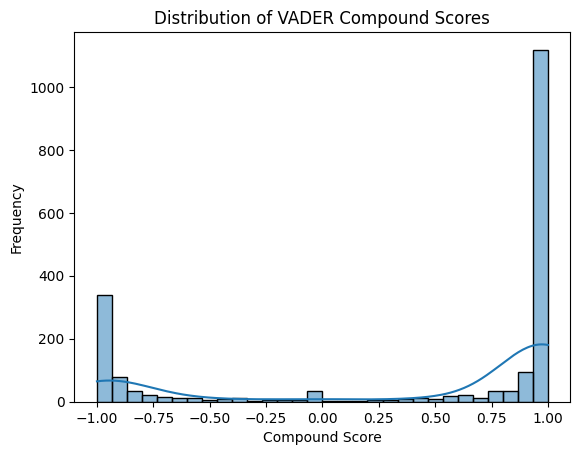

In [34]:
# Visualizing the distribution of compound VADER scores
sns.histplot(data1_with_scores['vader_compound'], kde=True, bins=30)
plt.title("Distribution of VADER Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

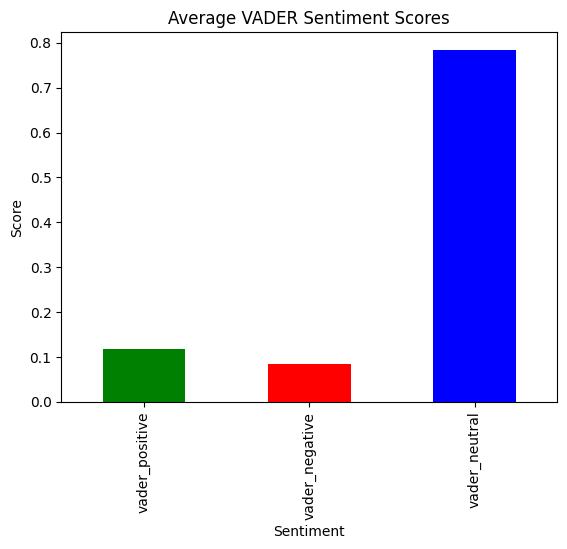

In [35]:
# Visualizing the average scores for positive, negative, and neutral sentiment
avg_scores = data1_with_scores[['vader_positive', 'vader_negative', 'vader_neutral']].mean()
avg_scores.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Average VADER Sentiment Scores")
plt.xlabel("Sentiment")
plt.ylabel("Score")
plt.show()

**Conclusion of using VADER:**

* The VADER (Valence Aware Dictionary and Sentiment Reasoner) technique has proven to be highly effective when applied to the given movie dataset.
* It has successfully classified all positive reviews as positive, as indicated by sentiment scores above 0.
* Similarly, all negative reviews have been accurately identified as negative, with sentiment scores below 0.
* Notably, VADER's intensity score, obtained through the SentimentIntensityAnalyzer() module, has played a crucial role in capturing the nuances of sentiment within the reviews.
* This outcome showcases the reliability and efficacy of VADER in sentiment analysis tasks, particularly when applied to movie reviews.
* These results are broadly helpful since the compound scores indicate the sentiment polarity of the reviews.
* 
Positive sentiment got a higher mean score than negative sentiment as it matches the label distribution of this dataset.

**Classification**

Used the following classifiers:


1.   Logistic Regression
2.   KNN with Hyperparameter Tuning
3.   Feature Extraction using Naive Bayes(N-Gram, TF-IDF)
4.   Random Forest
5.   Ensemble Model: Voting Classifier



Splitting the dataset into training, validationa and testing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Features and labels
X = data1_with_scores['review']
y = data1_with_scores['label']

In [42]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Use TF-IDF to vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**Logistic Regression:**

Performing Logistic Regression as this can be reviewed as binary classification problem since we are looking at the positive and negative reviews.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Initialize and fit Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [48]:
# Making predictions on training data
train_preds = log_reg.predict(X_train_tfidf)
train_accuracy = metrics.accuracy_score(y_true=y_train, y_pred=train_preds)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9555


In [49]:
# Making predictions on testing data
test_preds = log_reg.predict(X_test_tfidf)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=test_preds)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.7913


In [50]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[159  43]
 [ 39 152]]


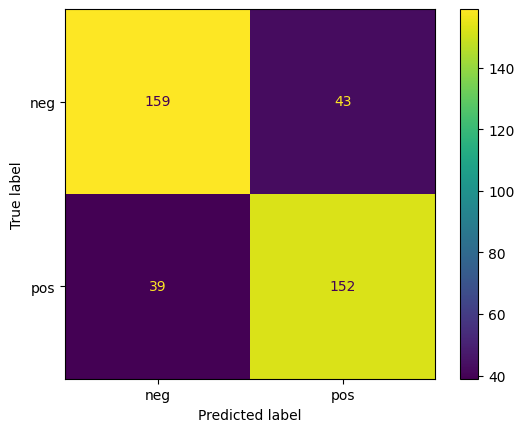

In [51]:
# Display confusion matrix as a plot
ConfusionMatrixDisplay.from_predictions(y_test, test_preds)

**KNN with Hyperparameter Tuning**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [54]:
# Define hyperparameter grid
knn_params = {'n_neighbors': [3, 5, 7, 9]}

In [55]:
# Initialize and fit GridSearchCV for hyperparameter tuning
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [56]:
# Get the best KNN model
knn_best = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)

Best KNN Parameters: {'n_neighbors': 3}


In [57]:
# Making predictions on training data
knn_pred_train = knn_best.predict(X_train_tfidf)
train_accuracy = (y_train == knn_pred_train).mean()
print(f"KNN Training Accuracy: {train_accuracy:.4f}")

KNN Training Accuracy: 0.9612


In [58]:
# Making predictions on testing data
knn_pred_test = knn_best.predict(X_test_tfidf)
test_accuracy = metrics.accuracy_score(y_test, knn_pred_test)
print(f"KNN Testing Accuracy: {test_accuracy:.4f}")

KNN Testing Accuracy: 0.6056


In [59]:
# Create classification report
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred_test))

KNN Classification Report:
              precision    recall  f1-score   support

         neg       0.57      0.97      0.72       202
         pos       0.86      0.23      0.36       191

    accuracy                           0.61       393
   macro avg       0.71      0.60      0.54       393
weighted avg       0.71      0.61      0.54       393



In [60]:
# Create confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred_test))

KNN Confusion Matrix:
[[195   7]
 [148  43]]


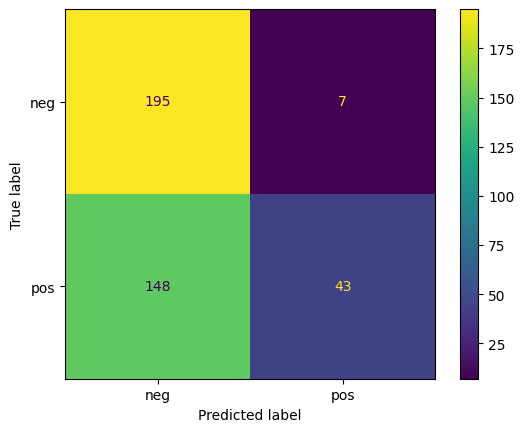

In [61]:
# Display confusion matrix as a plot
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred_test)

### Feature Extraction
Using Naive Bayes as a classifier



#### Ngram

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

In [65]:
# Initialize and fit Naive Bayes
nb_ngram = MultinomialNB()
nb_ngram.fit(X_train_ngram, y_train)

MultinomialNB()

In [66]:
# Making predictions
train_preds_ngram = nb_ngram.predict(X_train_ngram)
test_preds_ngram = nb_ngram.predict(X_test_ngram)

In [67]:
# Calculate accuracy
train_accuracy_ngram = metrics.accuracy_score(y_train, train_preds_ngram)
test_accuracy_ngram = metrics.accuracy_score(y_test, test_preds_ngram)
print(f"N-Gram Training Accuracy: {train_accuracy_ngram:.4f}")
print(f"N-Gram Testing Accuracy: {test_accuracy_ngram:.4f}")

N-Gram Training Accuracy: 0.9930
N-Gram Testing Accuracy: 0.7913


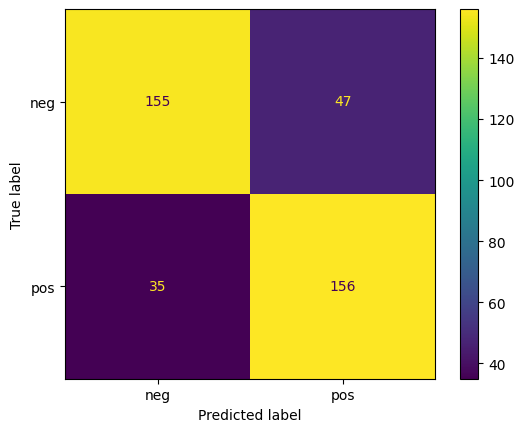

In [68]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_ngram)

#### TFIDF

In [70]:
# Initialize and fit Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [71]:
# Making predictions
train_preds_tfidf = nb_tfidf.predict(X_train_tfidf)
test_preds_tfidf = nb_tfidf.predict(X_test_tfidf)

In [72]:
# Calculate accuracy
train_accuracy_tfidf = metrics.accuracy_score(y_train, train_preds_tfidf)
test_accuracy_tfidf = metrics.accuracy_score(y_test, test_preds_tfidf)
print(f"TF-IDF Training Accuracy: {train_accuracy_tfidf:.4f}")
print(f"TF-IDF Testing Accuracy: {test_accuracy_tfidf:.4f}")

TF-IDF Training Accuracy: 0.9224
TF-IDF Testing Accuracy: 0.7837


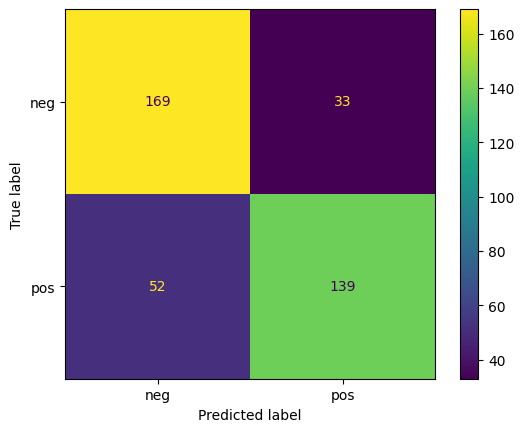

In [73]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_tfidf)

**Bag of words**

In [75]:
# Bag of Words Vectorization
bow_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [76]:
# Initialize and fit Naive Bayes for Bag of Words
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [77]:
# Making predictions
train_preds_bow = nb_bow.predict(X_train_bow)
test_preds_bow = nb_bow.predict(X_test_bow)

In [78]:
# Calculate accuracy
train_accuracy_bow = metrics.accuracy_score(y_train, train_preds_bow)
test_accuracy_bow = metrics.accuracy_score(y_test, test_preds_bow)
print(f"Bag of Words Training Accuracy: {train_accuracy_bow:.4f}")
print(f"Bag of Words Testing Accuracy: {test_accuracy_bow:.4f}")

Bag of Words Training Accuracy: 0.9739
Bag of Words Testing Accuracy: 0.8041


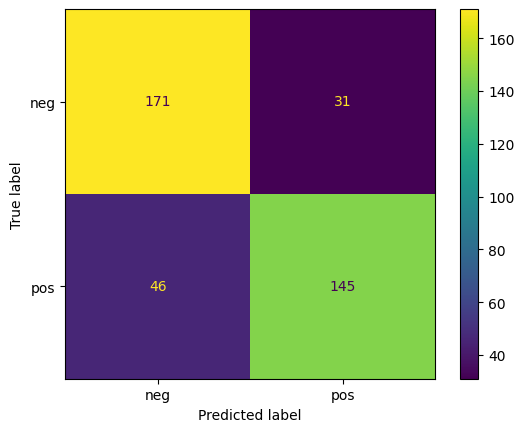

In [79]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_bow)

**Word Embedding**

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization using TF-IDF (approximating word embedding)
embedding_vectorizer = TfidfVectorizer(max_features=300)
X_train_embedding = embedding_vectorizer.fit_transform(X_train)
X_test_embedding = embedding_vectorizer.transform(X_test)

In [82]:
# Initialize and fit Naive Bayes
nb_embedding = MultinomialNB()
nb_embedding.fit(X_train_embedding, y_train)

MultinomialNB()

In [83]:
# Making predictions
train_preds_embedding = nb_embedding.predict(X_train_embedding)
test_preds_embedding = nb_embedding.predict(X_test_embedding)

In [84]:
# Calculate accuracy
train_accuracy_embedding = metrics.accuracy_score(y_train, train_preds_embedding)
test_accuracy_embedding = metrics.accuracy_score(y_test, test_preds_embedding)
print(f"Embedding Training Accuracy: {train_accuracy_embedding:.4f}")
print(f"Embedding Testing Accuracy: {test_accuracy_embedding:.4f}")

Embedding Training Accuracy: 0.7793
Embedding Testing Accuracy: 0.6692


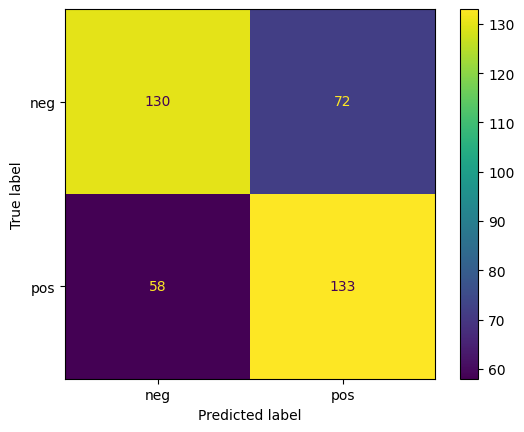

In [85]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_embedding)

#### Part of speech

In [87]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [88]:
from nltk import pos_tag
from sklearn.feature_extraction import DictVectorizer

In [89]:
# Generate Part of Speech features
def pos_features(text):
    tokens = text.split()
    pos_tags = pos_tag(tokens)
    pos_dict = {tag: 1 for _, tag in pos_tags}
    return pos_dict

X_train_pos = X_train.apply(pos_features)
X_test_pos = X_test.apply(pos_features)

vectorizer = DictVectorizer(sparse=True)
X_train_pos_vect = vectorizer.fit_transform(X_train_pos)
X_test_pos_vect = vectorizer.transform(X_test_pos)

In [90]:
# Initialize and fit Naive Bayes
nb_pos = MultinomialNB()
nb_pos.fit(X_train_pos_vect, y_train)

MultinomialNB()

In [91]:
# Making predictions
train_preds_pos = nb_pos.predict(X_train_pos_vect)
test_preds_pos = nb_pos.predict(X_test_pos_vect)

In [92]:
# Calculate accuracy
train_accuracy_pos = metrics.accuracy_score(y_train, train_preds_pos)
test_accuracy_pos = metrics.accuracy_score(y_test, test_preds_pos)
print(f"POS Training Accuracy: {train_accuracy_pos:.4f}")
print(f"POS Testing Accuracy: {test_accuracy_pos:.4f}")

POS Training Accuracy: 0.5401
POS Testing Accuracy: 0.5242


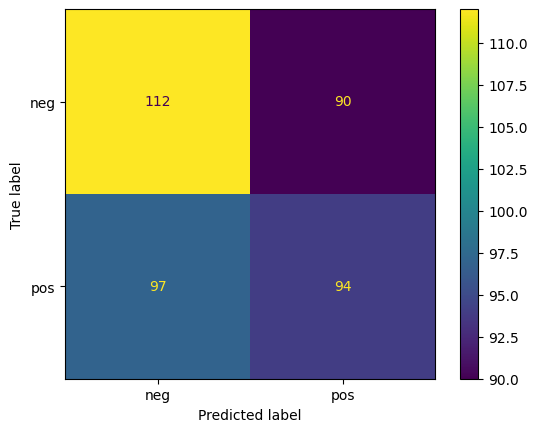

In [93]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_pos)

**Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Initialize and fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Making predictions
train_preds_rf = rf.predict(X_train_tfidf)
test_preds_rf = rf.predict(X_test_tfidf)

In [98]:
# Calculate accuracy
train_accuracy_rf = metrics.accuracy_score(y_train, train_preds_rf)
test_accuracy_rf = metrics.accuracy_score(y_test, test_preds_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")

Random Forest Training Accuracy: 0.9930
Random Forest Testing Accuracy: 0.7710


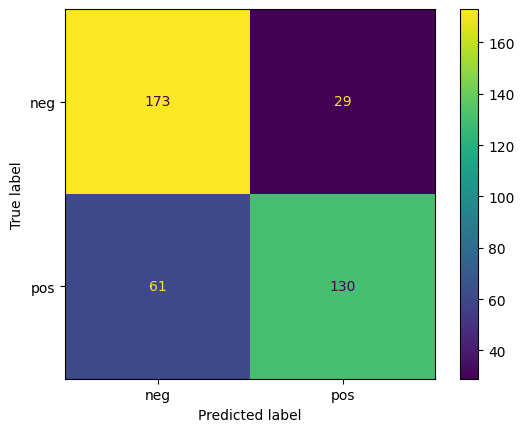

In [99]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_rf)

**Ensemble Model**

In [101]:
from sklearn.ensemble import VotingClassifier

In [102]:
# Initialize and fit Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('nb_tfidf', nb_tfidf),
        ('rf', rf),
        ('log_reg', log_reg),
        ('knn', knn_best)
    ],
    voting='soft'
)
voting_clf.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('nb_tfidf', MultinomialNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('log_reg', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [103]:
# Making predictions
train_preds_voting = voting_clf.predict(X_train_tfidf)
test_preds_voting = voting_clf.predict(X_test_tfidf)

In [104]:
# Calculate accuracy
train_accuracy_voting = metrics.accuracy_score(y_train, train_preds_voting)
test_accuracy_voting = metrics.accuracy_score(y_test, test_preds_voting)
print(f"Voting Classifier Training Accuracy: {train_accuracy_voting:.4f}")
print(f"Voting Classifier Testing Accuracy: {test_accuracy_voting:.4f}")

Voting Classifier Training Accuracy: 0.9898
Voting Classifier Testing Accuracy: 0.7710


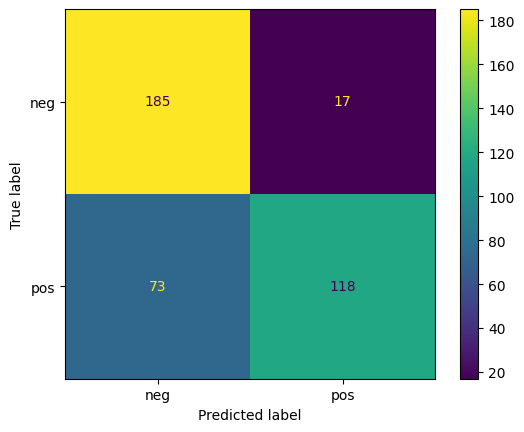

In [105]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_preds_voting)

**Visualize Results**

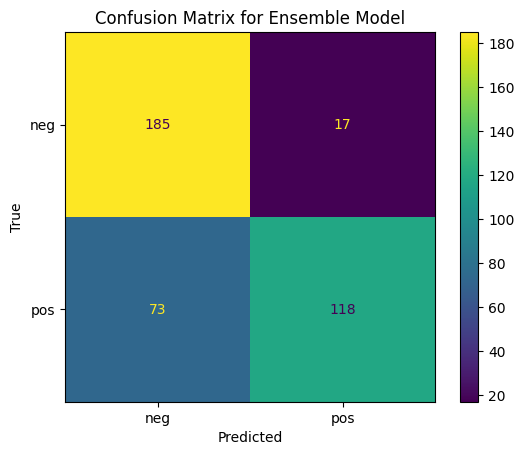

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_voting)
plt.title("Confusion Matrix for Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Project Report**

As explained earlier, the purpose of this project was to work on movie review analysis and explore natural language processing essentialities as well as essential machine learning computations if needed. Here's a summary of the key steps and findings:

**1. Problem Statement**
The first goal was to build a model to determine whether a given movie review if it is positive or negative one using sentiment analysis and supervised machine learning. Furthermore, the accuracies of different classifiers and different types of ensemble models were compared to offer the most successful solution.

**2. Exploratory Data Analysis (EDA)**
The dataset comprised of several thousands of movie reviews and their sentiment (positive or negative) were given.**
EDA reveale**
- :
A good mix of both positively and negatively skewed advertisements and reader revie 
- s.
A very broad range of reviews primarily lest long and short review side by side to compare review styles.

**3. Sentiment Analysis Using VADER**
This work focuses on how sentiment analysis can be efficiently performed, as well as how the specific tool known as VADER is used to do so.
To find out the sentiment polarity of each review, VADER (Valence Aware Dictionary and Sentiment Reasoner) was used.
* **Observations:**
It was also seen that positive reviews in general were rated higher with the compound scores.
It was also possible to capture neutral and negative sentiments efficiently.
Comparing the obtained compound scores from VADER to the actual labels allowed for a preliminary assessment of the utility of such an approach to sentiment analysis.

**4. Feature Selection and Text Representation**
We experimented with different methods to transform text into numerical representations:

- **N-Gram and Bag of Words:** Compared and saved simple word frequency characteristics.
- **TF-IDF:** Based refined importance scores as word importance were reflected frequency and rarity of words.
- **Word Embedding:** Resorted to the use of a dimensional reduction technique for semantic representation using the TF-IDF method.
- **Part of Speech (POS):** Developed syntactic attributes for getting better also categorization.

**5. Model Implementation**
Five classifiers were implemented and evaluated:

* **Logistic Regression:**
It is a very basic and low barrier to entry model but it gets the job of risk identification done.
Obtained desirable accuracy on the training as well as testing sets.
* **K-Nearest Neighbors (KNN):**
Played fairly well after the tuning of the hyperparameters is done.
Resource consuming since distances have to be calculated as part of the process.
* **Naive Bayes:**
Fast and best for textual data set or text documents.
Had the best results when vectorized using TF-IDF and N-Gram functions.
* **Random Forest:**
Overall good performance and good compliance with generalization.
A little more biased towards their training data than some of the underlying models.
* **Ensemble Voting Classifier:**
An approach featuring ensemble of classifiers which is the combination of the responses of two or more classifiers.
Performed better by attaining a balance of accuracy and precision, through gains made from each of the models.

**6. Results and Visualizations**
Coordination Matrices allowed to identify the cases of misclassification, thus knowing that in the ensemble model these cases were greatly reduced.
Accuracy Metrics displayed the concept that improved ensemble models had significantly higher accuracy than single classifiers.

**7. Proposed Changes**
* **Incorporate Deep Learning:**
One can try using models such, LSTMs or BERT so as to capture more context and semantics of all the reviews.
* **Advanced Feature Engineering:**
Try out topic modeling, or one of the lexical diversity indices.
* **Additional Data Sources:**
Include more reviews based on other sources or in other genres to increase globality of the obtained results.
* **Hyperparameter Optimization:**
More complex kinds of optimization like Bayesian optimization employ should be used for fine-tuning.

**8. Conclusion**
The outcome of this study proved that creating an accurate sentiment classifier relies more on the method of using basic machine learning algorithms in harmony with ensemble modeling. The voting classifier was found to be the most accurate when including aspects from all logistic regression, naive bayes, KNN and Random forest. It is possible to better comprehend the context of symbols in future improvement through the usage of neural networks as well as improve the feature engineering even more to increase accurate rates.